In [ ]:
print("""
@File         : amazon.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-04-04 15:35:06
@Email        : cuixuanstephen@gmail.com
@Description  : 
""")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_style("darkgrid")
from sklearn.preprocessing import (
    LabelEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    OneHotEncoder,
)
import warnings

warnings.filterwarnings("ignore")
import os
import plotly.graph_objects as go
import joblib
import itertools
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    explained_variance_score,
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    balanced_accuracy_score,
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    classification_report,
    f1_score,
)
from sklearn.model_selection import (
    cross_val_score,
    train_test_split,
    RandomizedSearchCV,
    GridSearchCV,
    StratifiedKFold,
)
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.linear_model import LogisticRegression, SGDClassifier
from pathlib import Path

curr_path = Path(os.getcwd())
df = pd.read_csv(curr_path / "Amazon.csv")

In [2]:
df.shape

(6155, 7)

In [4]:
list(df.columns)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
print('Total number of null values:', df.isnull().sum().sum())

Total number of null values: 0


In [10]:
missing = df.isna().sum().reset_index()
missing.columns = ['features', 'total_missing']
missing

,features,total_missing
0,Date,0
1,Open,0
2,High,0
3,Low,0
4,Close,0
5,Adj Close,0
6,Volume,0


In [11]:
missing['percent'] = missing['total_missing'] / len(df) * 100
missing

,features,total_missing,percent
0,Date,0,0.0
1,Open,0,0.0
2,High,0,0.0
3,Low,0,0.0
4,Close,0,0.0
5,Adj Close,0,0.0
6,Volume,0,0.0


In [12]:
missing = missing.set_index('features')

<AxesSubplot: xlabel='features'>

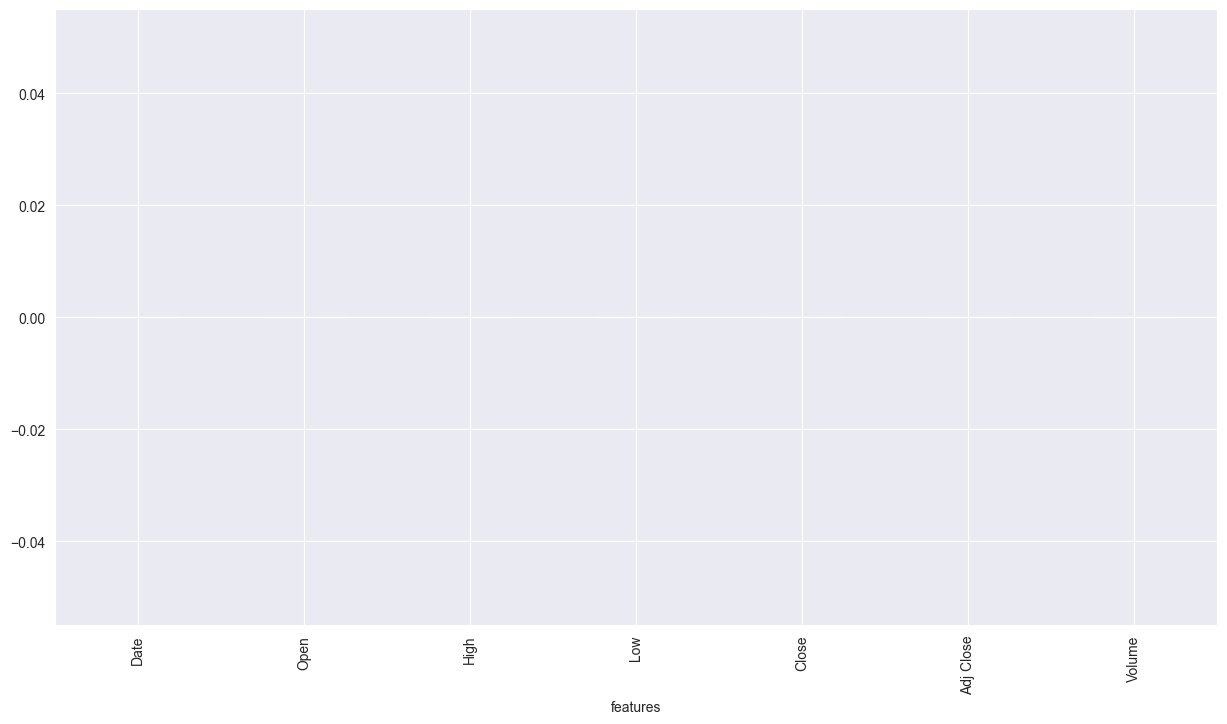

In [13]:
plt.figure(figsize=(15, 8))
missing['total_missing'].plot(kind='bar')

**检查相关性**

In [14]:
all_corr = df.corr().abs()['Adj Close'].sort_values(ascending=False)

In [21]:
all_corr.to_string()

'Close        1.000000\nAdj Close    1.000000\nLow          0.999928\nHigh         0.999924\nOpen         0.999842\nVolume       0.240122'

In [20]:
df.corr().abs()['Adj Close'].sort_values()

Volume       0.240122
Open         0.999842
High         0.999924
Low          0.999928
Close        1.000000
Adj Close    1.000000
Name: Adj Close, dtype: float64

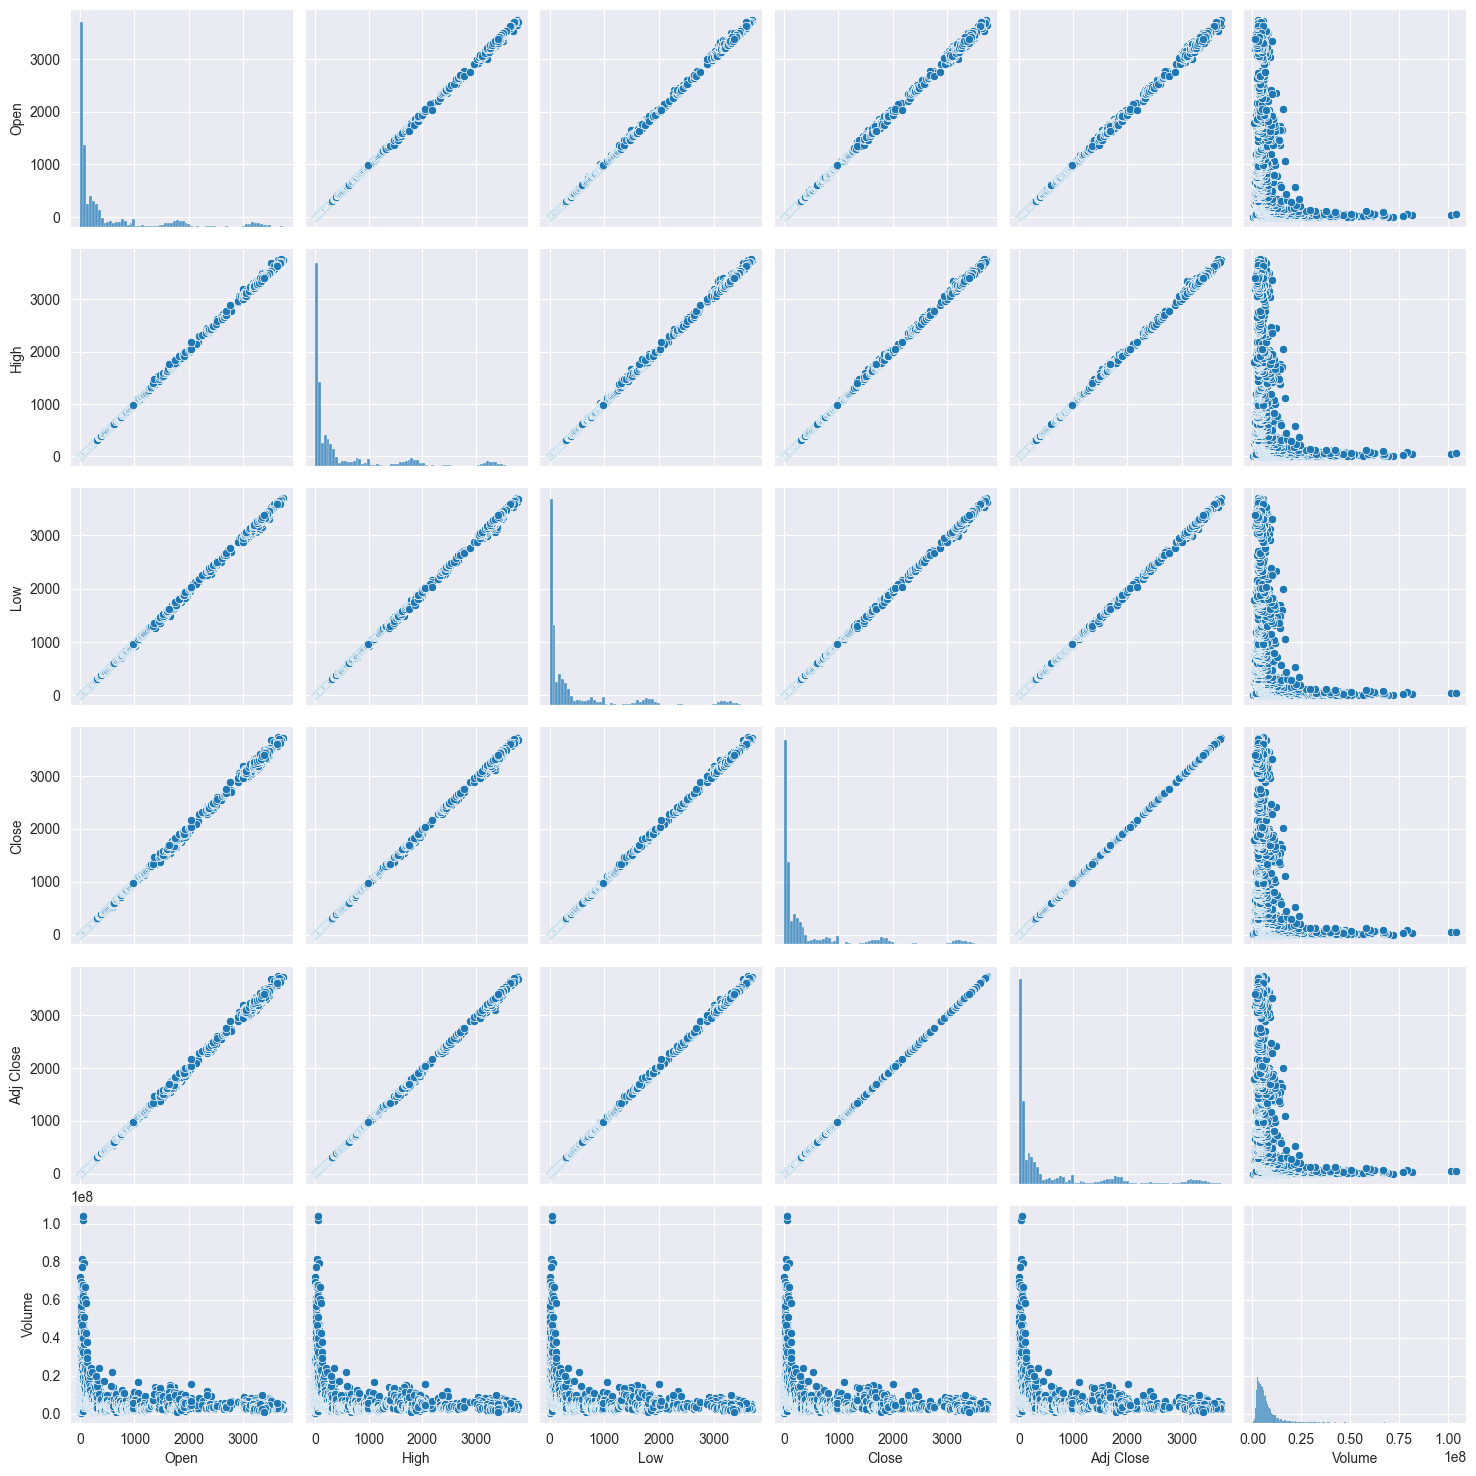

In [22]:
sns.pairplot(df)
plt.tight_layout()

<AxesSubplot: >

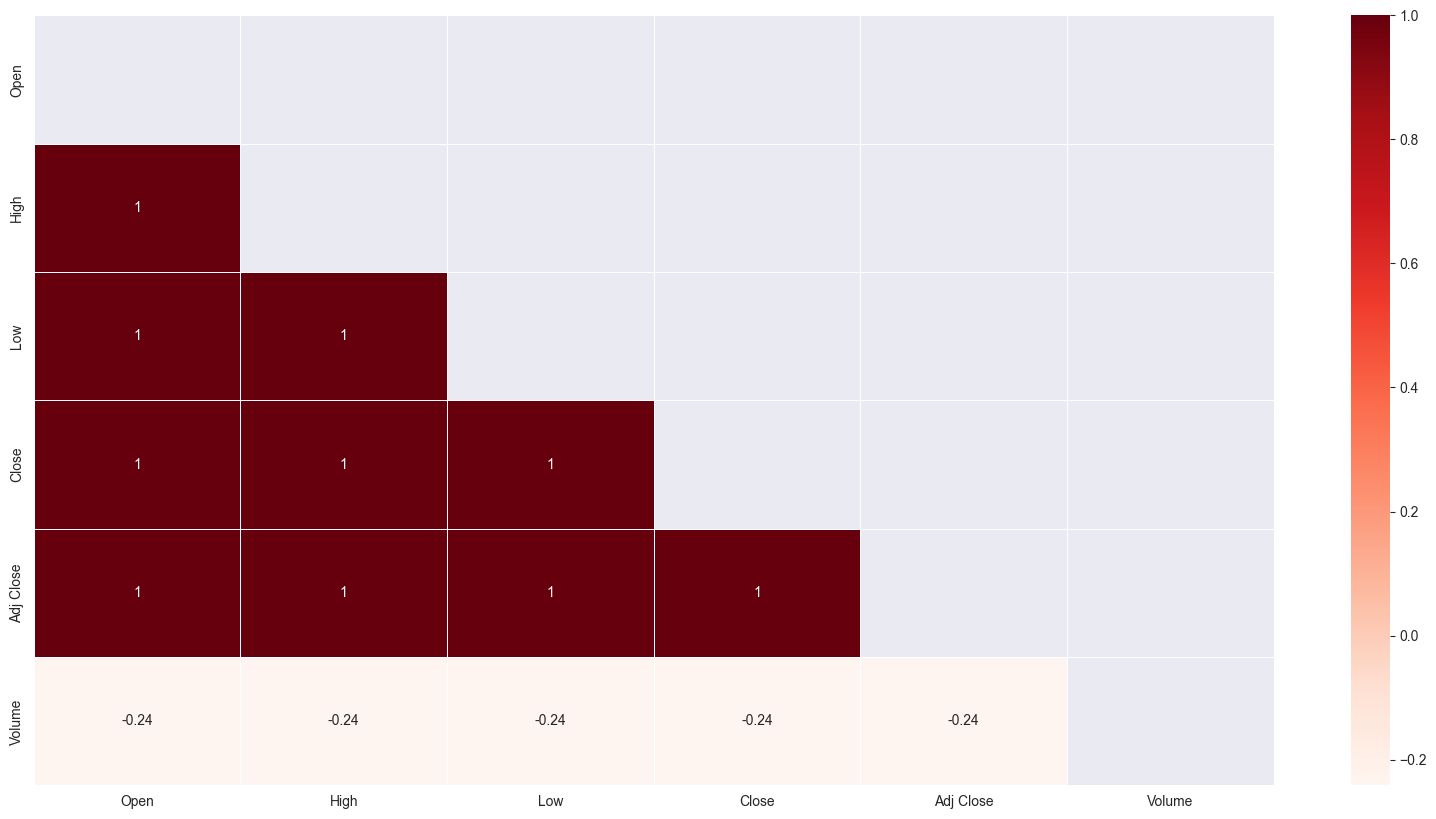

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
# 数组的下三角，对角线下面全部是 0 或者 False
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
sns.heatmap(df.corr(), annot=True, cmap='Reds', mask=mask, linewidths=.5)

**提取时间相关特征**